In [1]:
import tensorflow as tf
from IPython.display import Image

## 1. 인공신경망 원리

수식으로 표현한 인공 뉴런

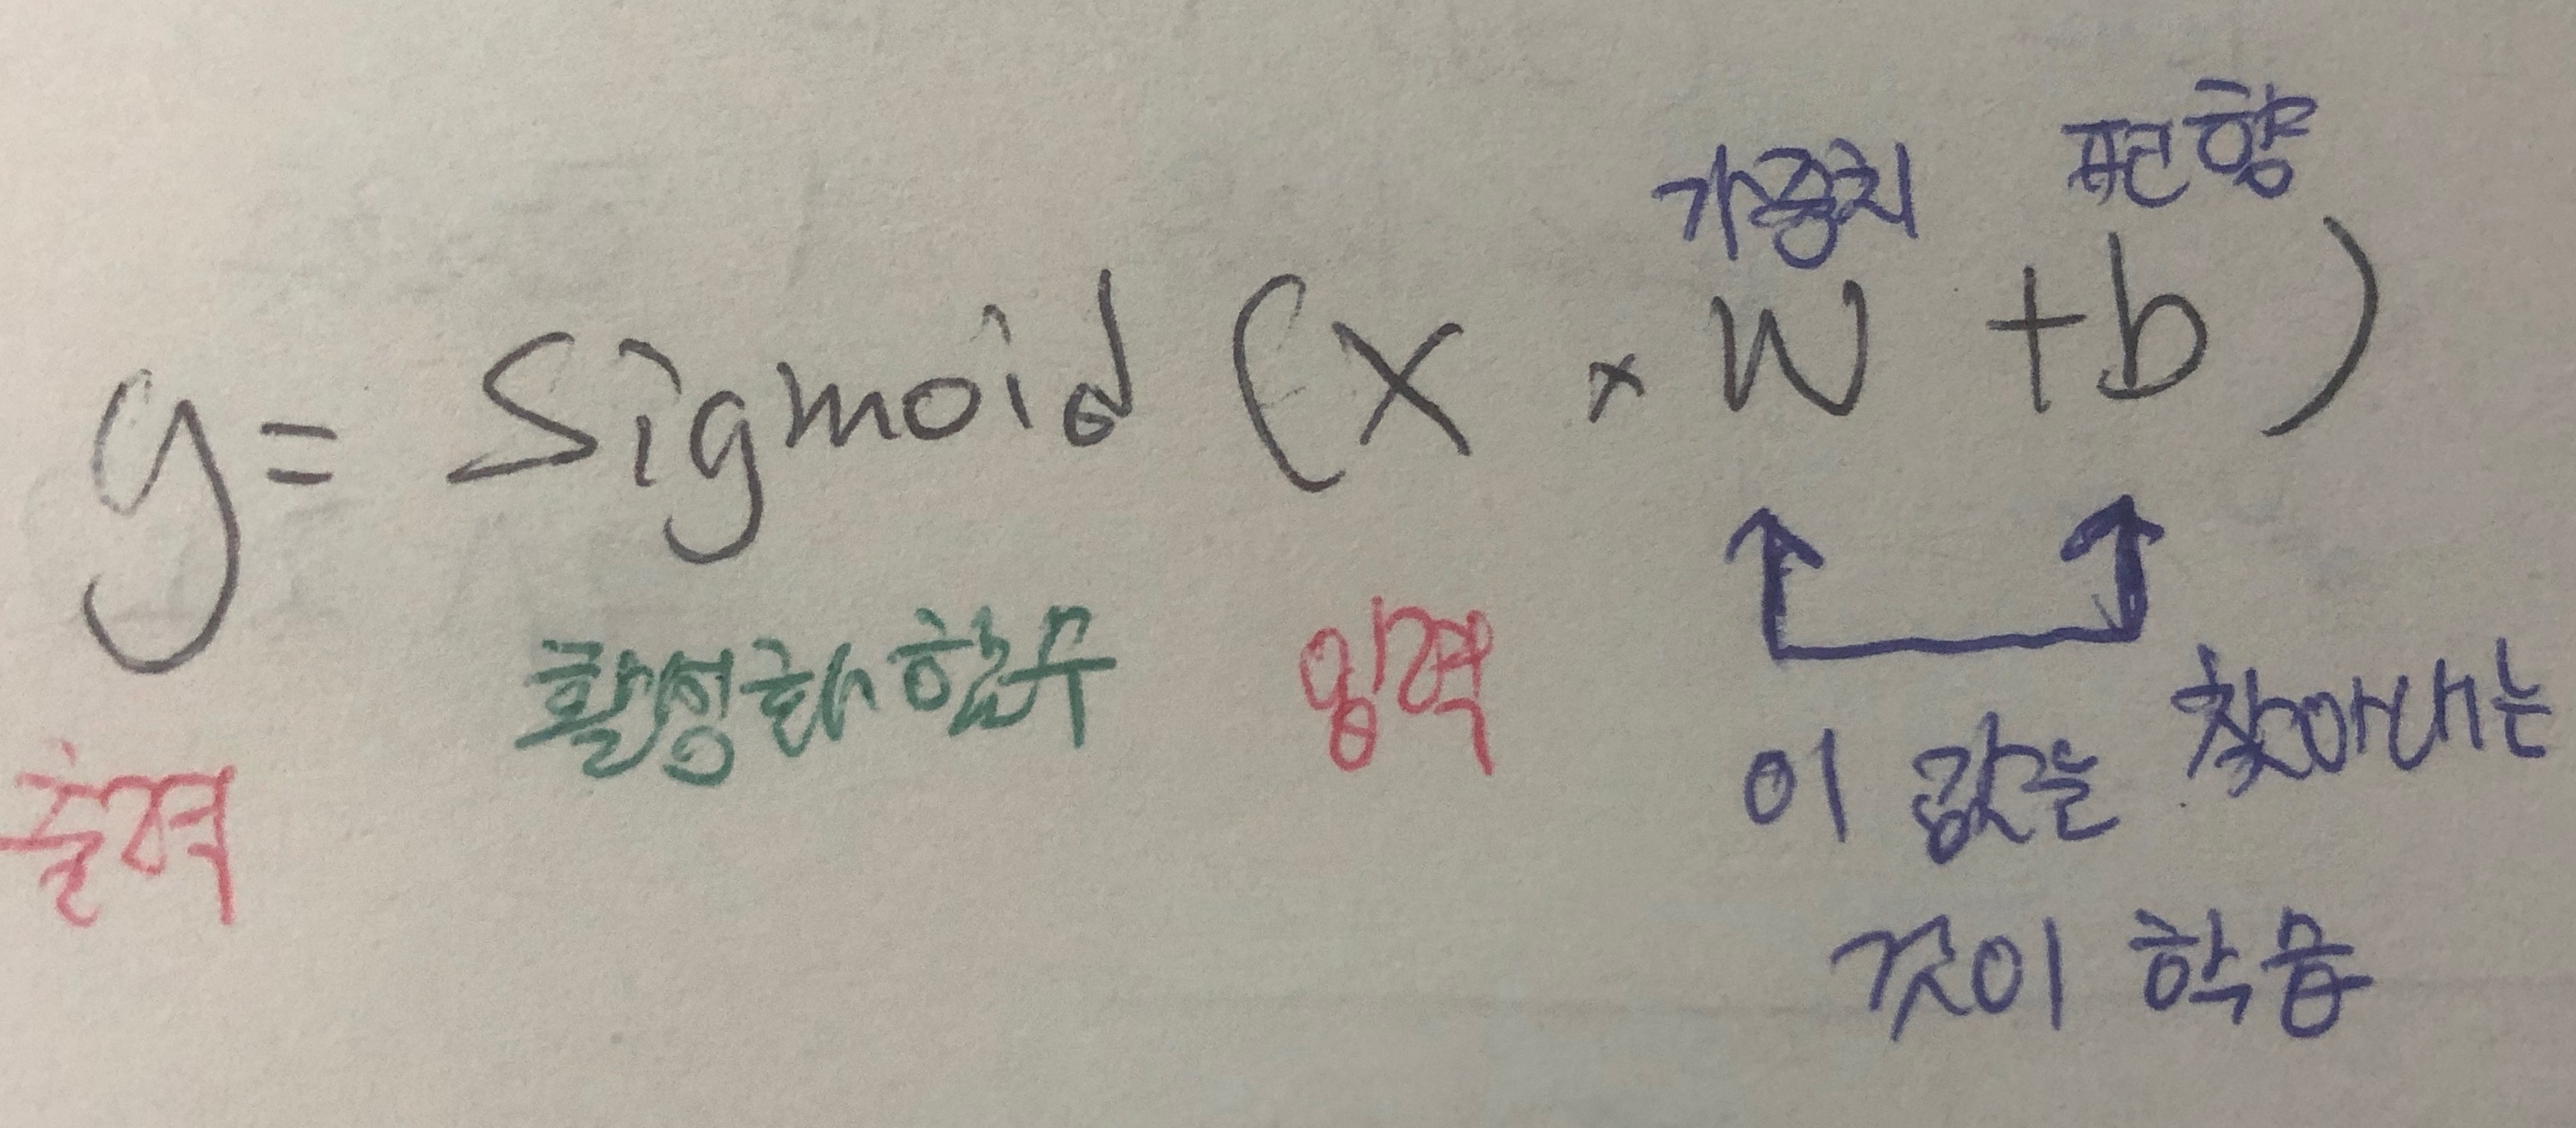

In [3]:
Image('IMG_0539.jpg')

활성화 함수
- 인공신경망을 통과해온 값을 최종적으로 어떤 값으로 만들지 결정
- 대표적으로 Sigmoid, ReLU, tanh가 있음

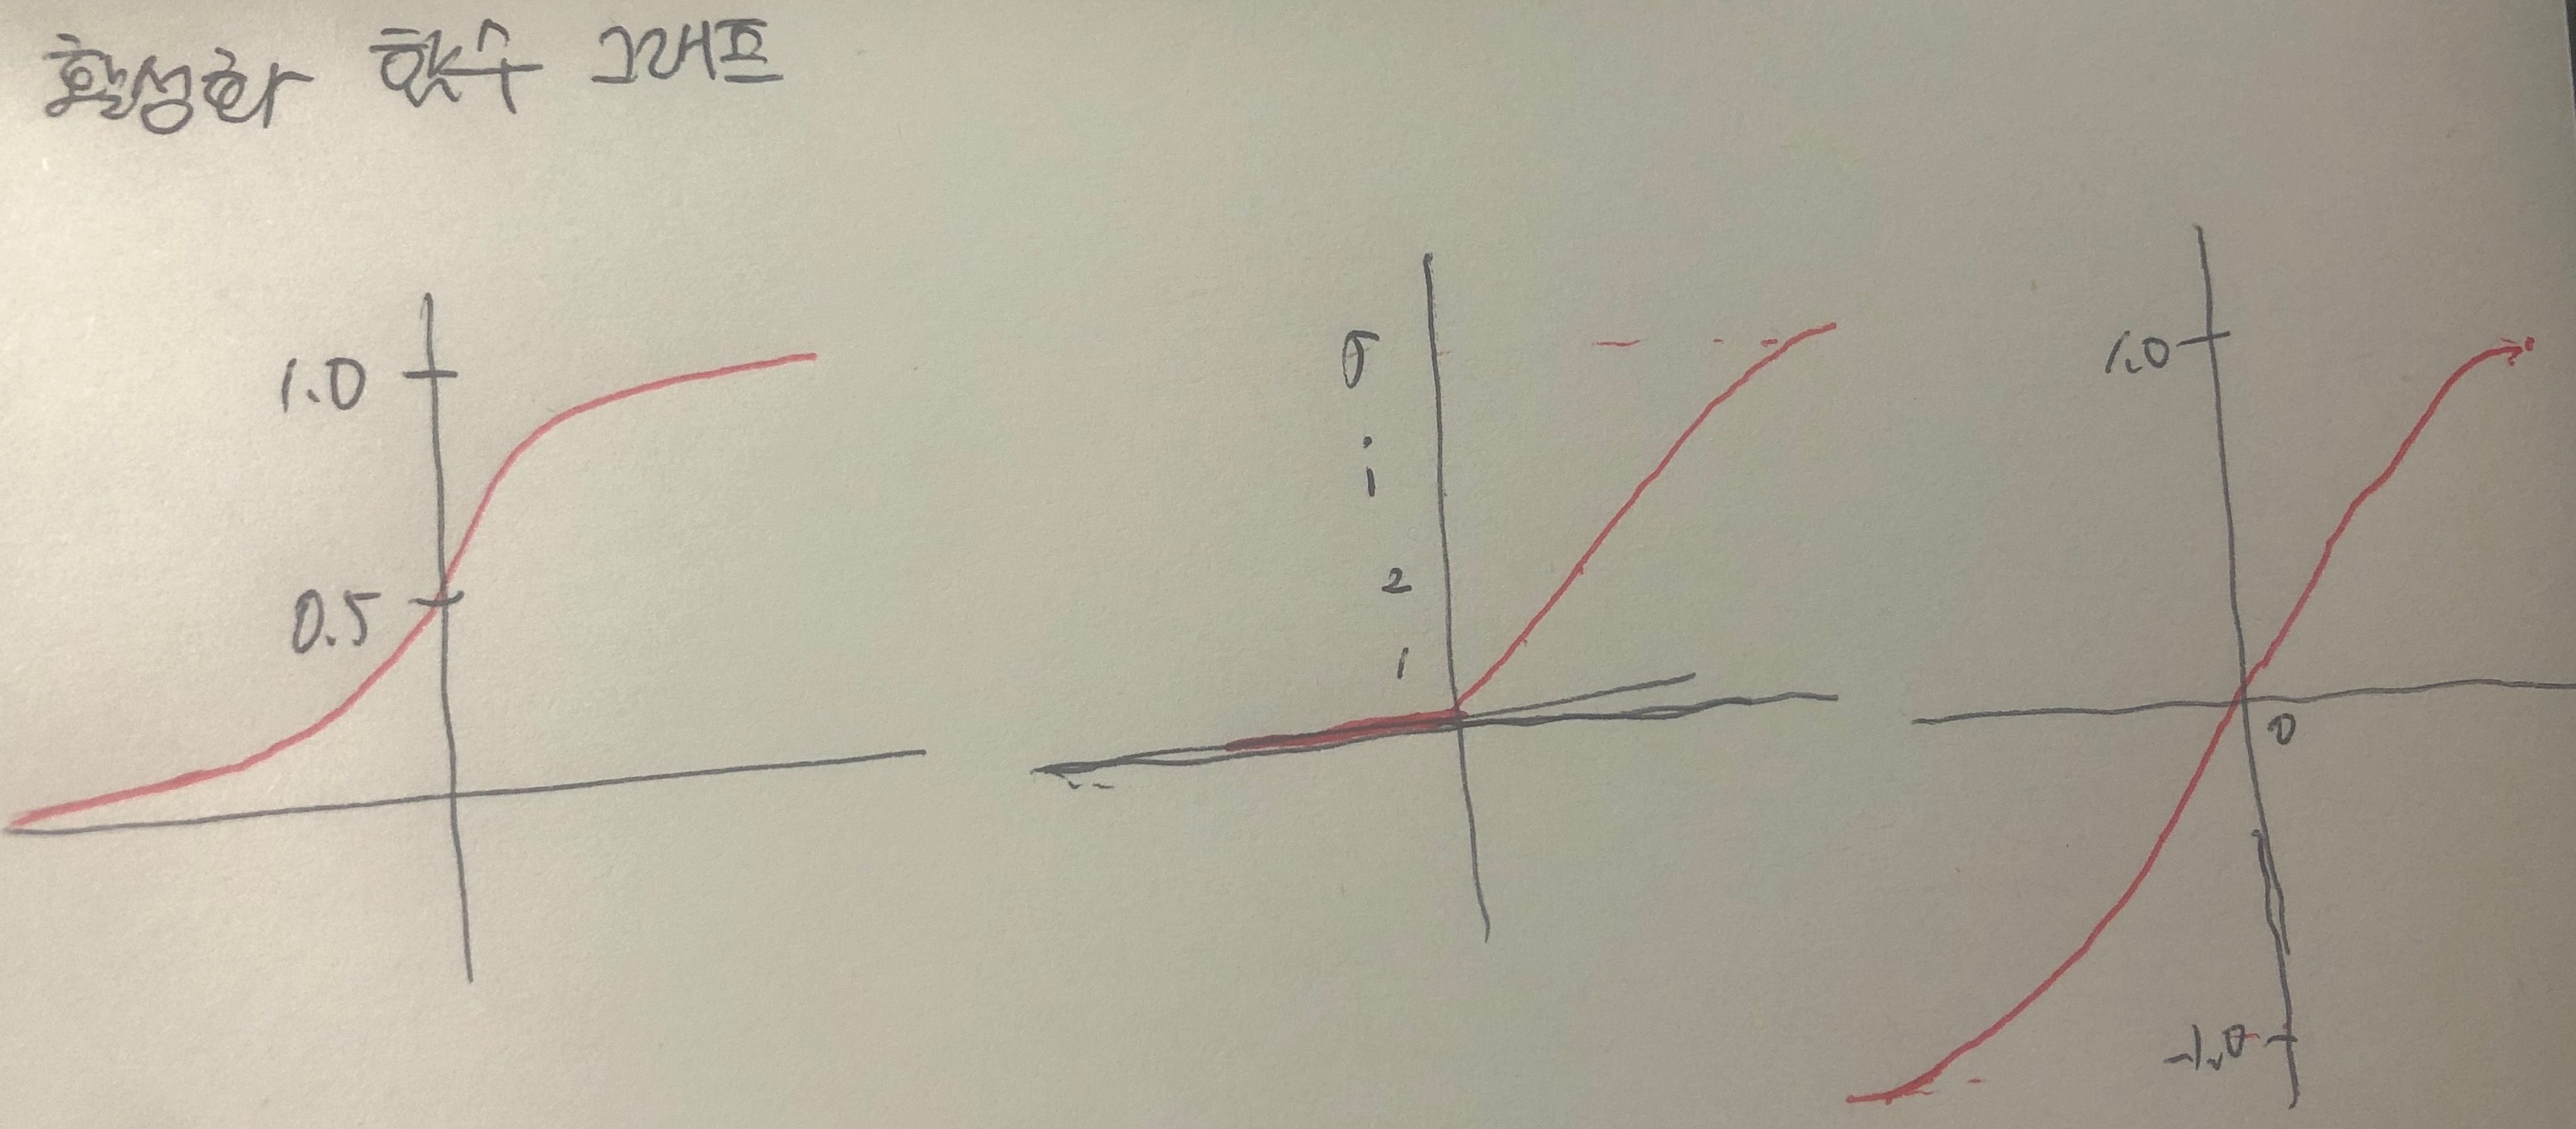

In [5]:
Image('IMG_0540.jpg')

제한된 볼츠만 머신(Restricted Boltzmann Machine)
- 제프리 힌튼이 개발한 신경망 내의 알고리즘 요소
- 신경망 층수 증가에 따른 경사감소 소멸(Gradient Descent Vanishing)을 해결하고자 함

역전파(Backpropagation)
 - 출력층이 내놓은 결과의 오차를 신경망을 따라 입력층까지 역으로 전파하여 계산
 - 최적화 과정을 보다 빠르고 정확하게 해주는 알고리즘
 - 따로 정리 필요

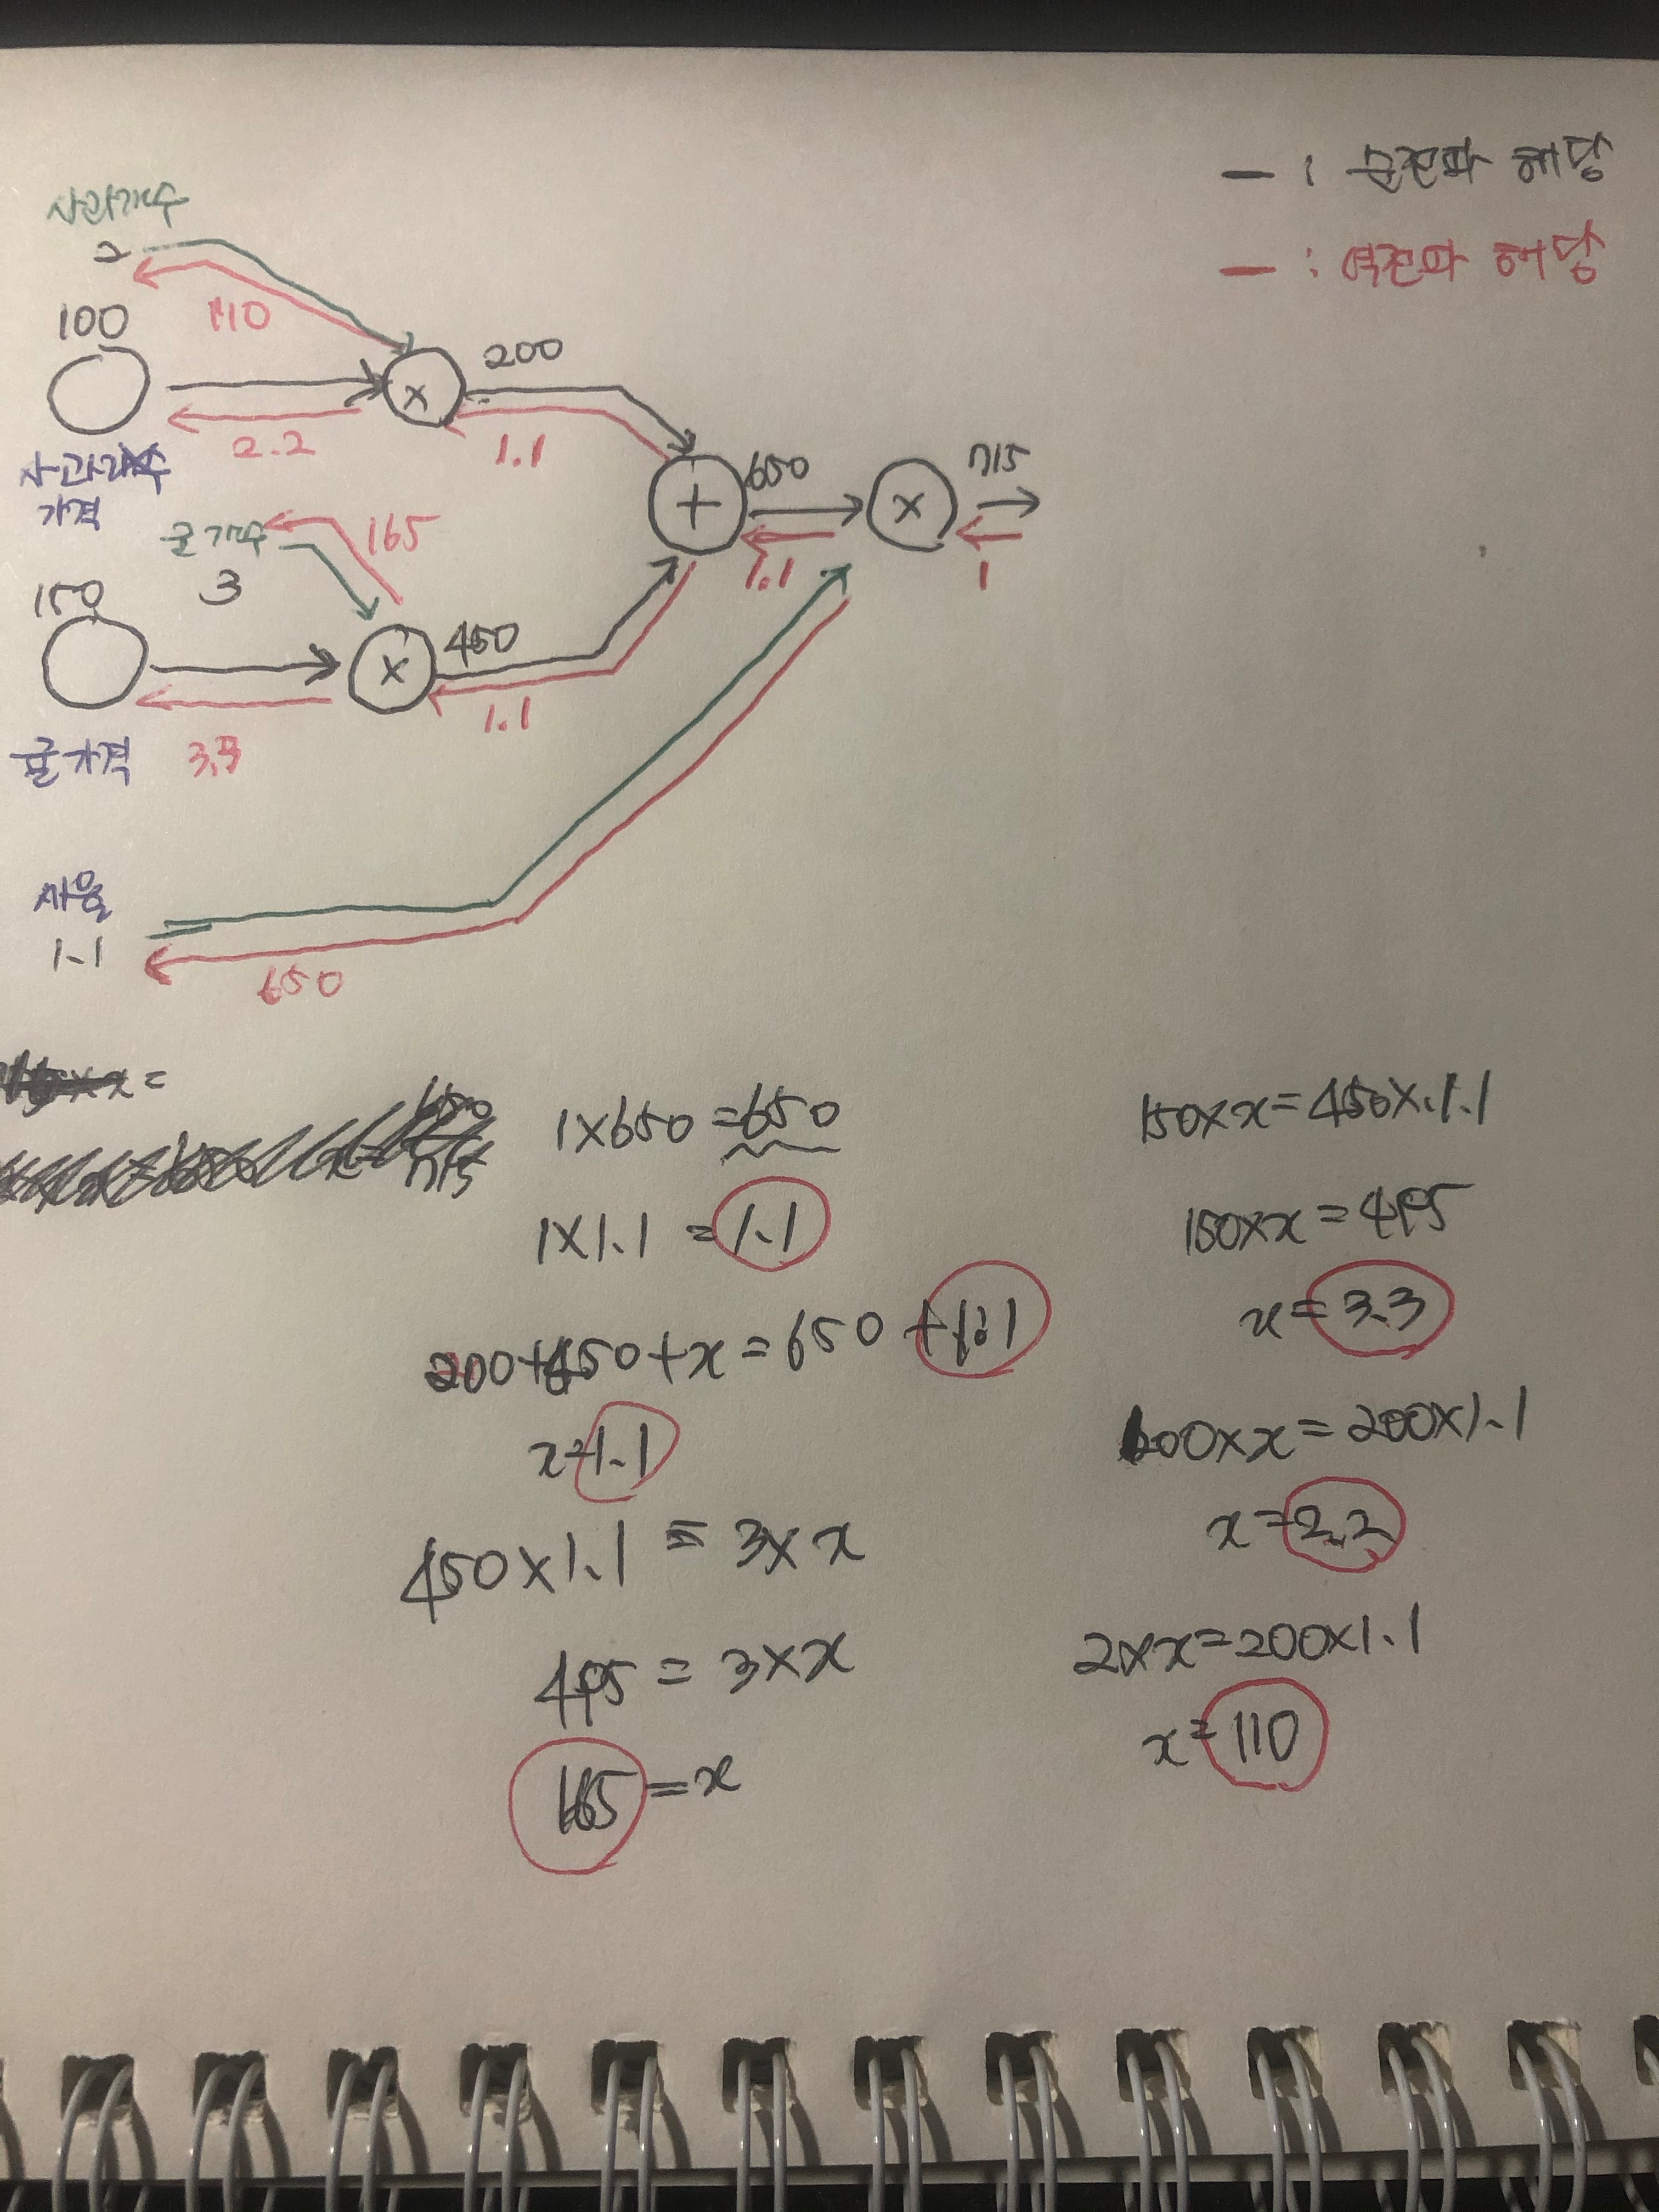

In [6]:
Image('IMG_0541.jpg')

## 2. 간단한 분류 모델 구현

In [7]:
import numpy as np

In [8]:
# [털, 날개]
x_data = np.array([[0,0], [1, 0], [1,1], [0,0], [0,0], [0,1]])

In [9]:
# one-hot encoding : 데이터가 가질 수 있는 값들을 일렬로 나열(레이블 데이터를 나열할때 사용)
y_data = np.array([
                   [1,0,0], # 기타
                   [0,1,0], # 포유류
                   [0,0,1], # 조류
                   [1,0,0],
                   [1,0,0],
                   [0,0,1]
                  ])

In [10]:
# 신경망 모델 구성
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [11]:
# 가중치(2행 3열) = [입력층(특징 수), 출력층(레이블 수)]
W = tf.Variable(tf.random_uniform([2,3], -1., 1.))
b = tf.Variable(tf.zeros([3]))

In [12]:
L = tf.add(tf.matmul(X,W), b)
L = tf.nn.relu(L)

In [13]:
model = tf.nn.softmax(L)

In [27]:
# 손실함수 작성(one-hot encoding을 이용한 대부분의 모델에서 사용하는 교차 엔트로피(cross-entropy) 사용)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))

In [28]:
# 경사하강법으로 최적화
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

# 세션 초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 학습 진행
for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    # 10번에 한번씩 손실값을 출력
    if (step + 1) % 10 == 0:
        print(step+1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

10 0.9756703
20 0.97022223
30 0.96491414
40 0.95972735
50 0.95465785
60 0.94970036
70 0.94485956
80 0.9401373
90 0.93561
100 0.9314721


In [29]:
# 결과 확인
prediction = tf.argmax(model, axis=1)
target = tf.argmax(Y, axis=1)
print('예측값 : ', sess.run(prediction, feed_dict={X: x_data}))
print('실제값 : ', sess.run(target, feed_dict={Y: y_data}))

예측값 :  [2 1 2 2 2 2]
실제값 :  [0 1 2 0 0 2]


In [30]:
is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 : %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

정확도 : 50.00


## 심층 신경망 구현하기

In [32]:
W1 = tf.Variable(tf.random_uniform([2,10], -1., 1.)) # [특징, 은닉층의 뉴런 수]
W2 = tf.Variable(tf.random_uniform([10,3], -1., 1.)) # [은닉층의 뉴런 수, 분류 수]

b1 = tf.Variable(tf.zeros([10])) # 은닉층의 뉴런 수
b2 = tf.Variable(tf.zeros([3])) # 분류 수

In [33]:
# 은닉층에만 사용
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

In [34]:
model = tf.add(tf.matmul(L1, W2), b2)

In [35]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

In [36]:
# 세션 초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 학습 진행
for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    # 10번에 한번씩 손실값을 출력
    if (step + 1) % 10 == 0:
        print(step+1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

10 0.8841639
20 0.7469178
30 0.62282354
40 0.51485443
50 0.41822636
60 0.3342501
70 0.26494542
80 0.20829718
90 0.1630441
100 0.12759842


In [37]:
# 결과 확인
prediction = tf.argmax(model, axis=1)
target = tf.argmax(Y, axis=1)
print('예측값 : ', sess.run(prediction, feed_dict={X: x_data}))
print('실제값 : ', sess.run(target, feed_dict={Y: y_data}))

예측값 :  [0 1 2 0 0 2]
실제값 :  [0 1 2 0 0 2]


In [38]:
is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 : %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

정확도 : 100.00
